In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set(style="whitegrid", color_codes=True)
from sklearn import preprocessing

In [2]:
df= pd.read_csv('adult.csv')

In [3]:
df.shape

(48842, 15)

In [4]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#### finding the missing value and replacing it.

In [5]:
df=df.replace('?',np.nan)

In [6]:
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                 0.0 %
workclass          5.73 %
fnlwgt              0.0 %
education           0.0 %
educational-num     0.0 %
marital-status      0.0 %
occupation         5.75 %
relationship        0.0 %
race                0.0 %
gender              0.0 %
capital-gain        0.0 %
capital-loss        0.0 %
hours-per-week      0.0 %
native-country     1.75 %
income              0.0 %
dtype: object

In [7]:
columns_with_nan = ['workclass', 'occupation', 'native-country']

In [8]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass          0.0 %
fnlwgt             0.0 %
education          0.0 %
educational-num    0.0 %
marital-status     0.0 %
occupation         0.0 %
relationship       0.0 %
race               0.0 %
gender             0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
native-country     0.0 %
income             0.0 %
dtype: object

#### done with the missing value

In [11]:
df.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,36705,NaN,15784,NaN,22379,8981,19716,41762,32650,NaN,NaN,NaN,44689,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.9+ MB


#### Visualization

Separating the Categorical and Numerical data

In [13]:
categorical = df.select_dtypes(include = ["object"]).keys()
categorical

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [14]:
numerical=df.select_dtypes(include=["int64"]).keys()
numerical

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

### Univariate Analysis;--

c:\users\pulkit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


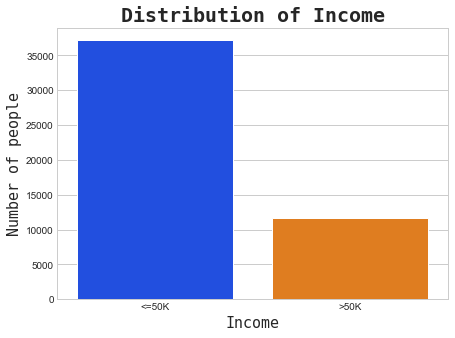

In [15]:
# Creating a barplot for 'Income'
income = df['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sb.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

c:\users\pulkit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


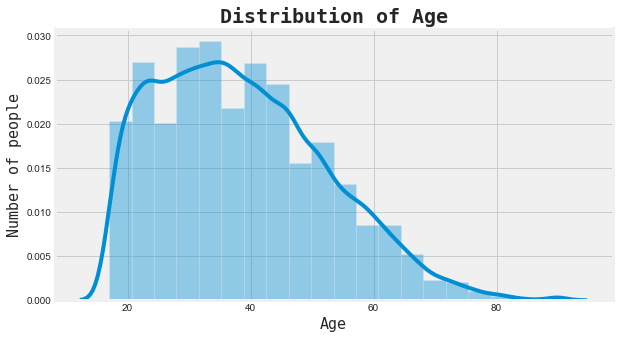

In [16]:
# Creating a distribution plot for 'Age'
age = df['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sb.distplot(df['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

c:\users\pulkit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


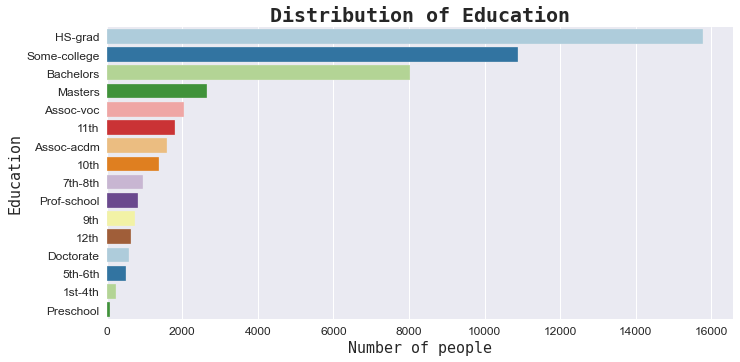

In [17]:
edu = df['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sb.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

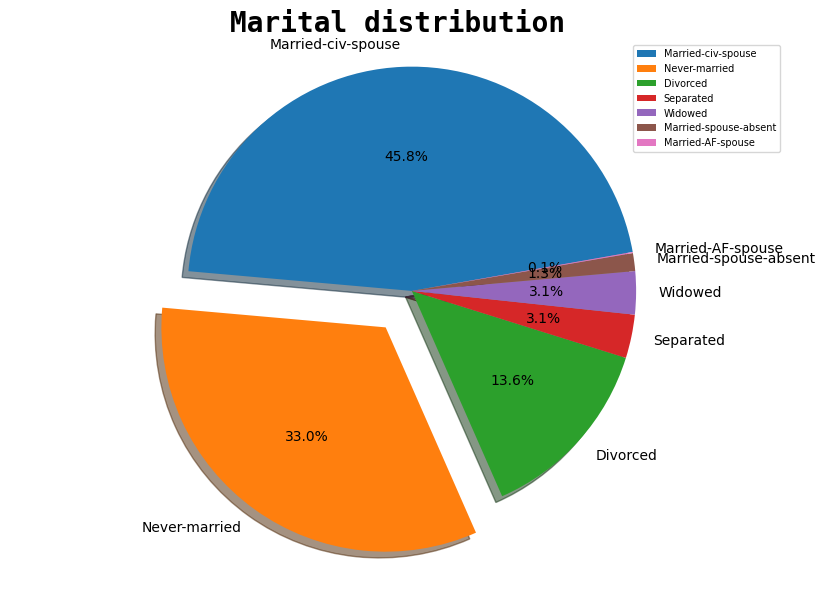

In [18]:
# Creating a pie chart for 'Marital status'
marital = df['marital-status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

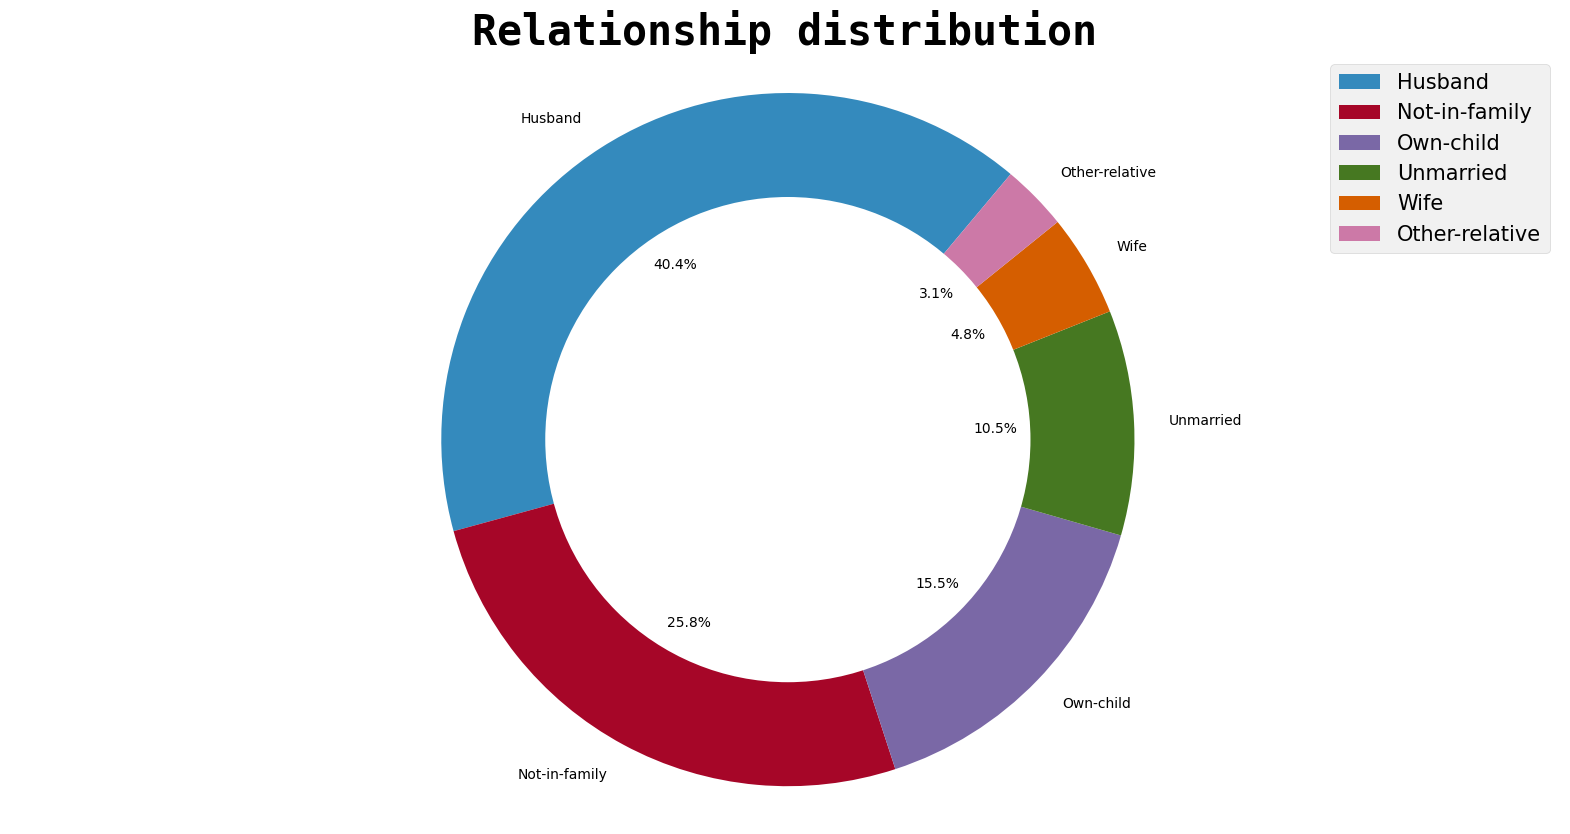

In [19]:
# Creating a donut chart for 'Age'
relation = df['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

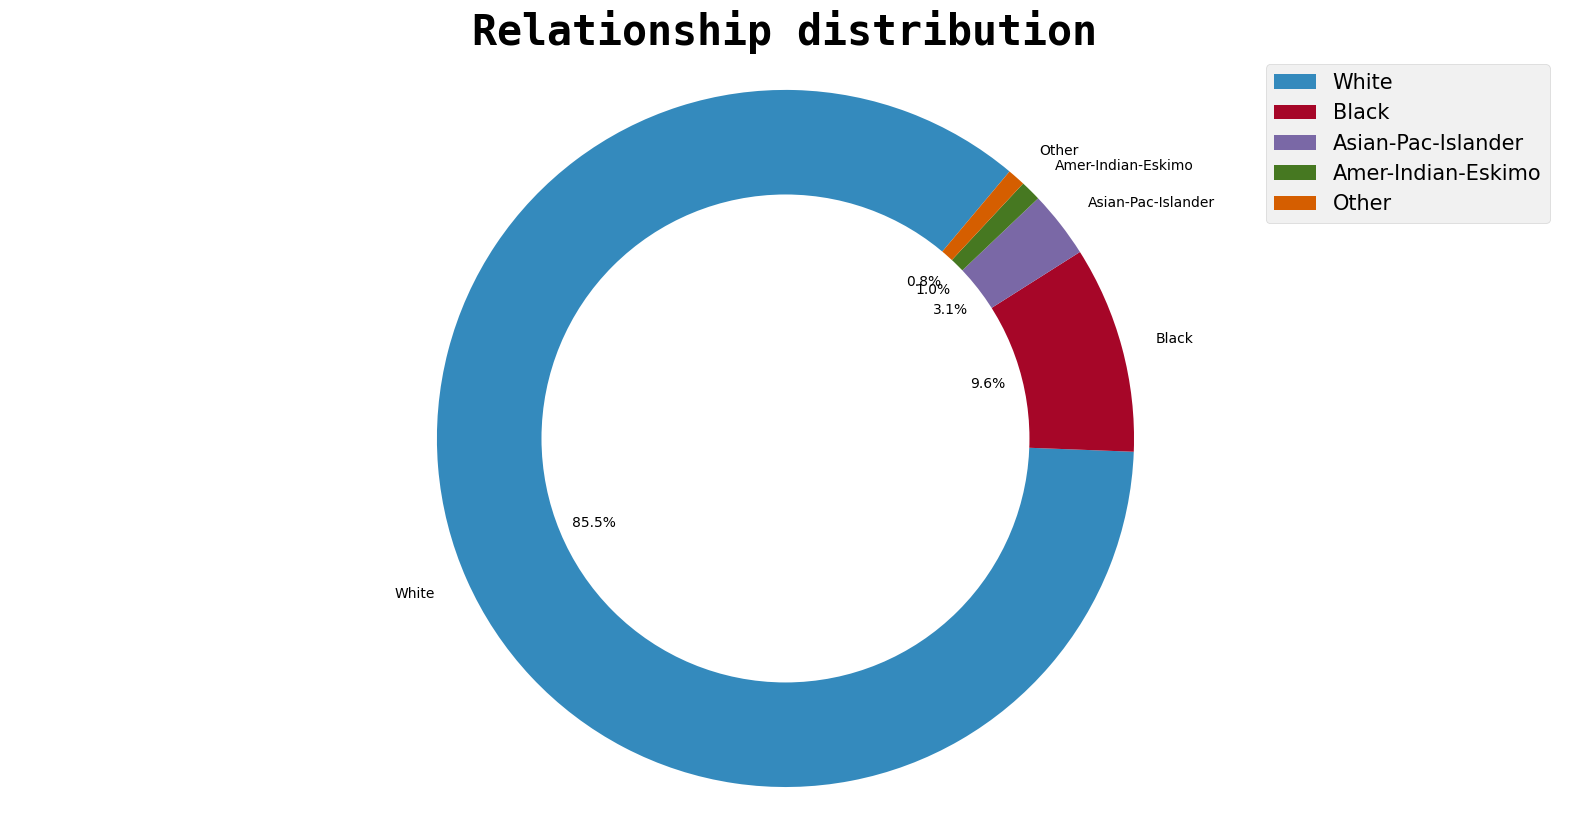

In [20]:
# Creating a donut chart for 'Age'
relation = df['race'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

c:\users\pulkit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


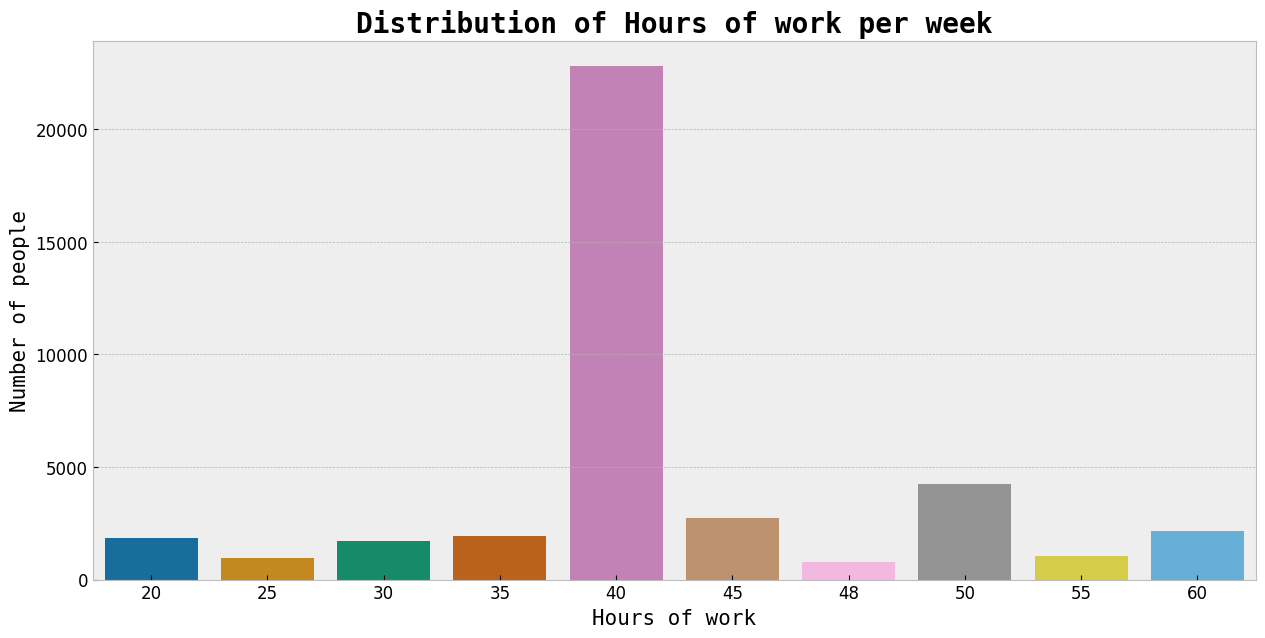

In [21]:
# Creating a barplot for 'Hours per week'
hours = df['hours-per-week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sb.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

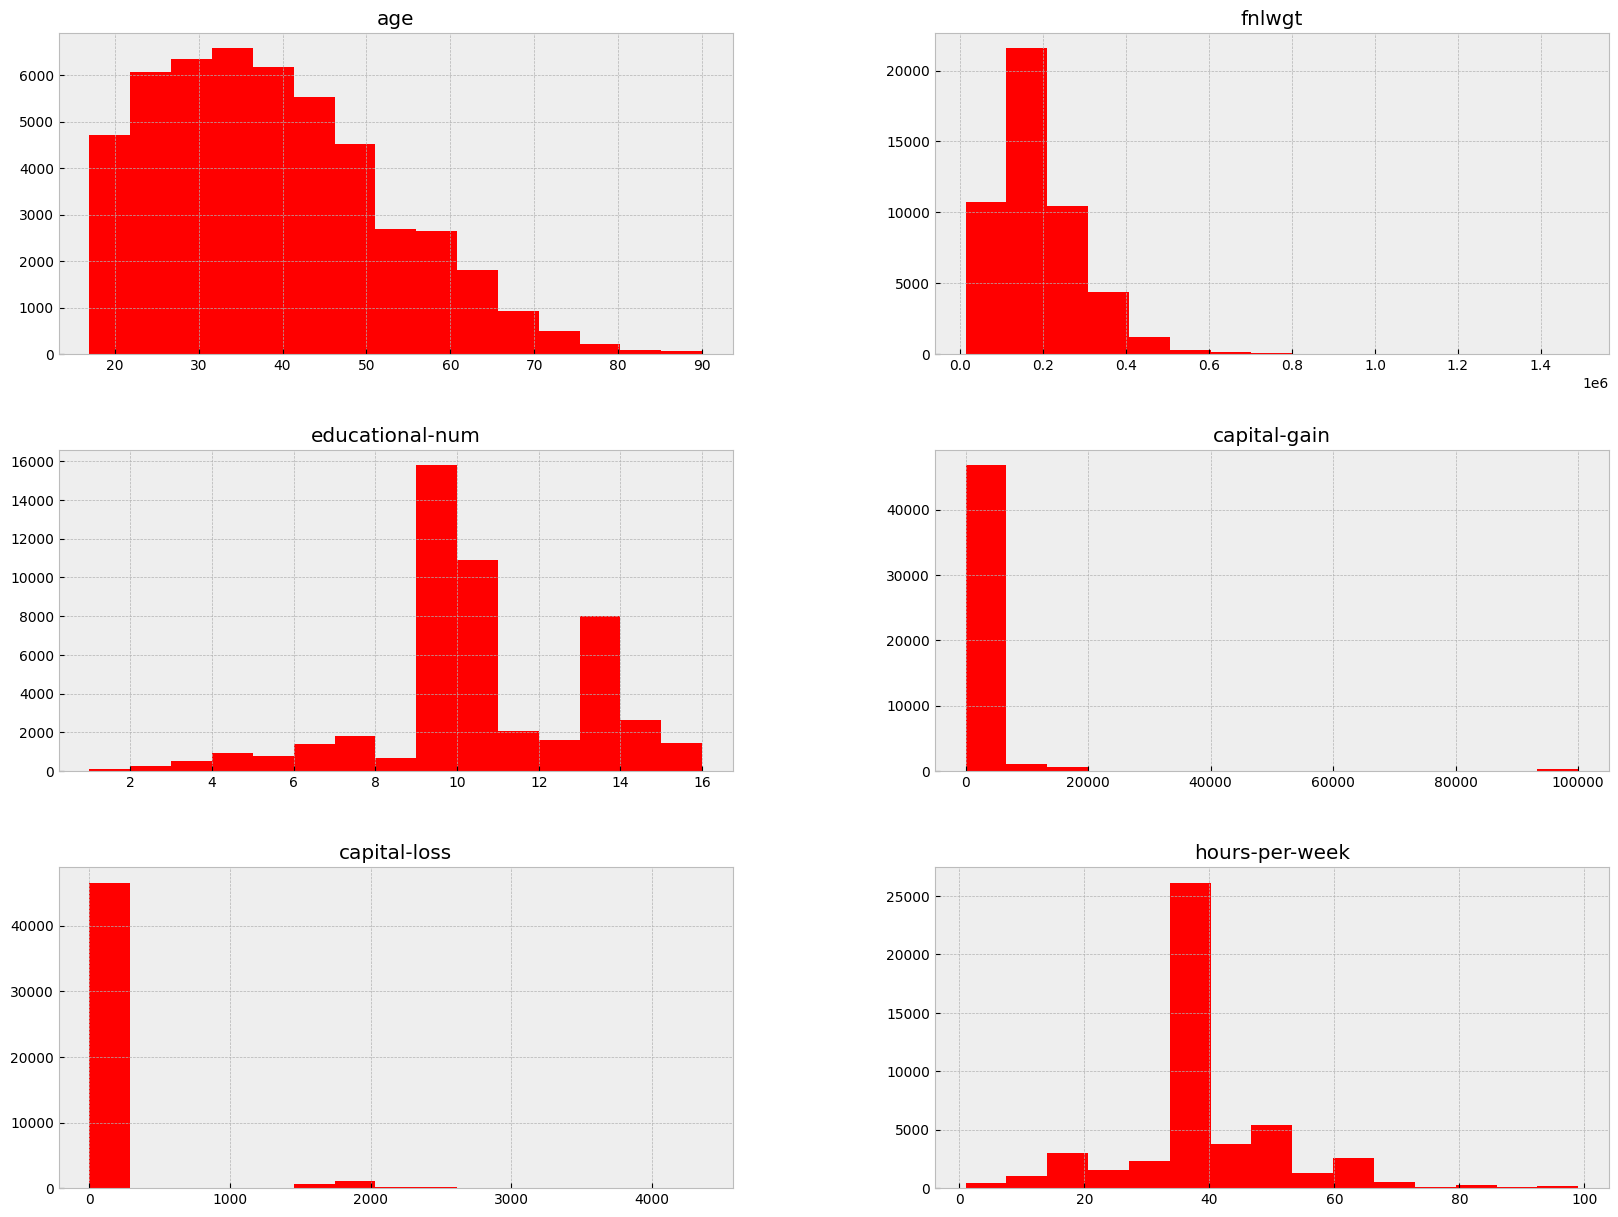

In [22]:
df.hist(bins=15, figsize=(20,15), color = 'red')
plt.show()

### Bivariate Analysis:--

c:\users\pulkit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


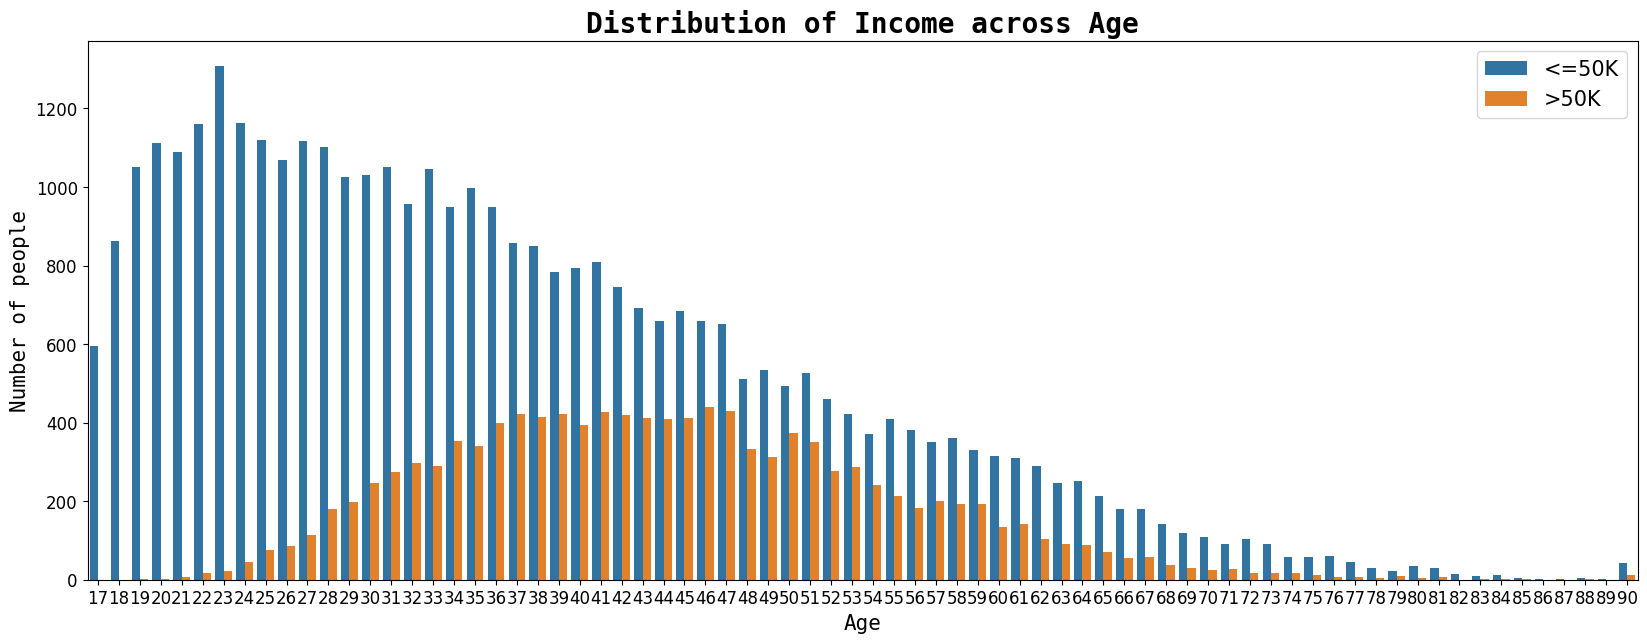

In [23]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sb.countplot(df['age'], hue=df['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

c:\users\pulkit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


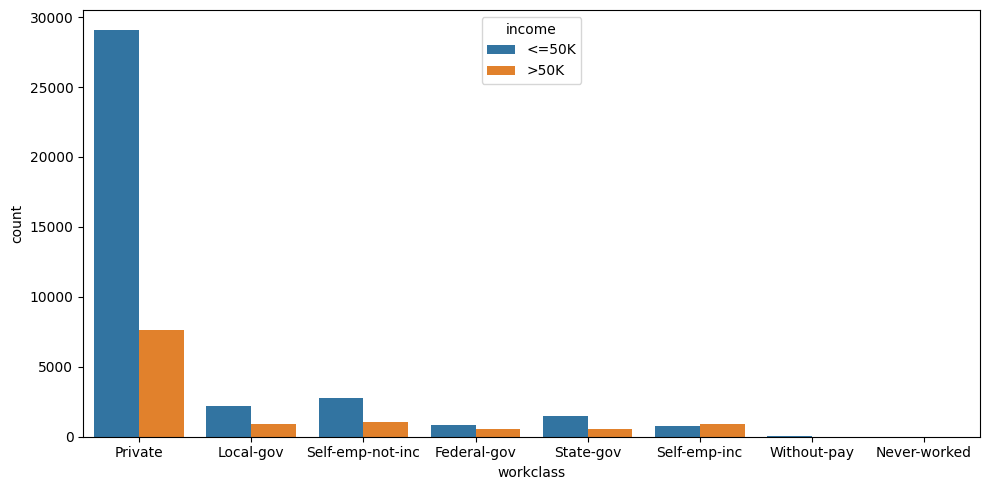

In [24]:
fig = plt.figure(figsize=(10,5))
sb.countplot('workclass', hue='income', data=df)
plt.tight_layout()
plt.show()

c:\users\pulkit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


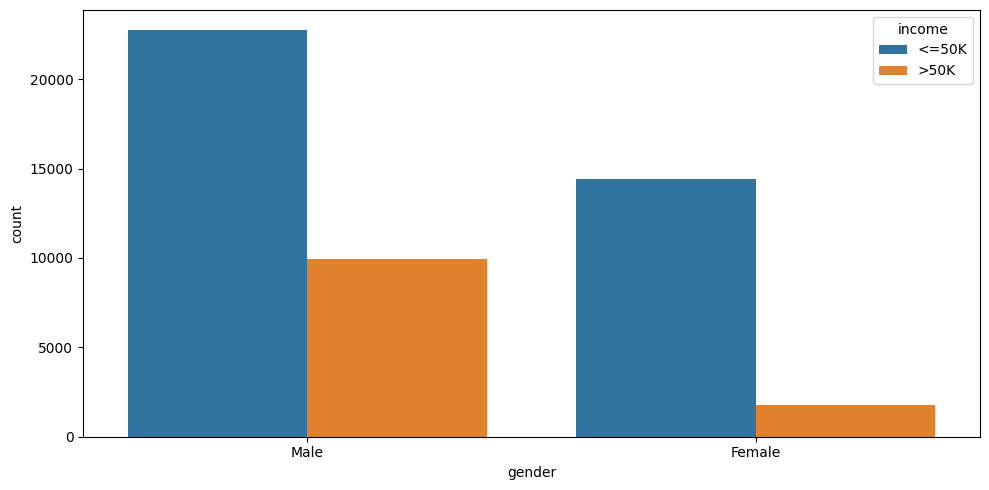

In [25]:
fig = plt.figure(figsize=(10,5))
sb.countplot('gender', hue='income', data=df)
plt.tight_layout()
plt.show()

c:\users\pulkit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


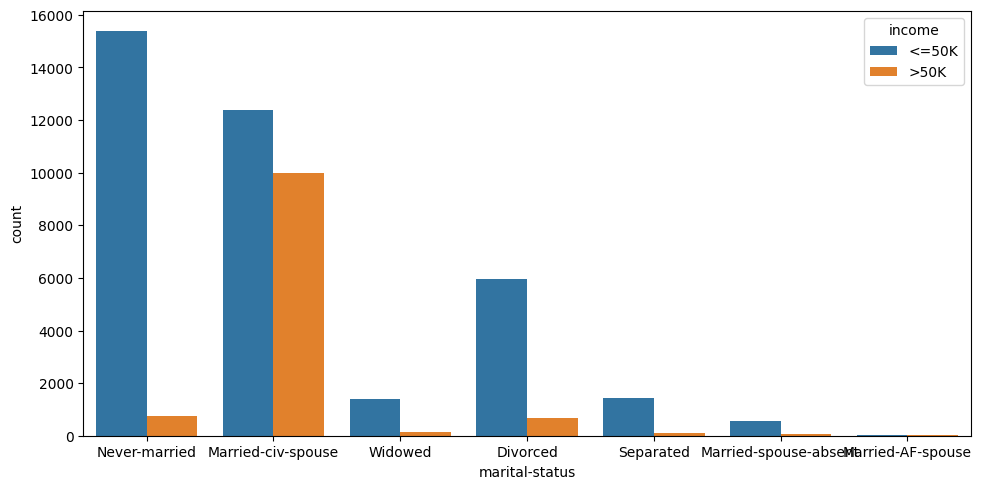

In [26]:
fig = plt.figure(figsize=(10,5))
sb.countplot('marital-status', hue='income', data=df)
plt.tight_layout()
plt.show()

c:\users\pulkit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


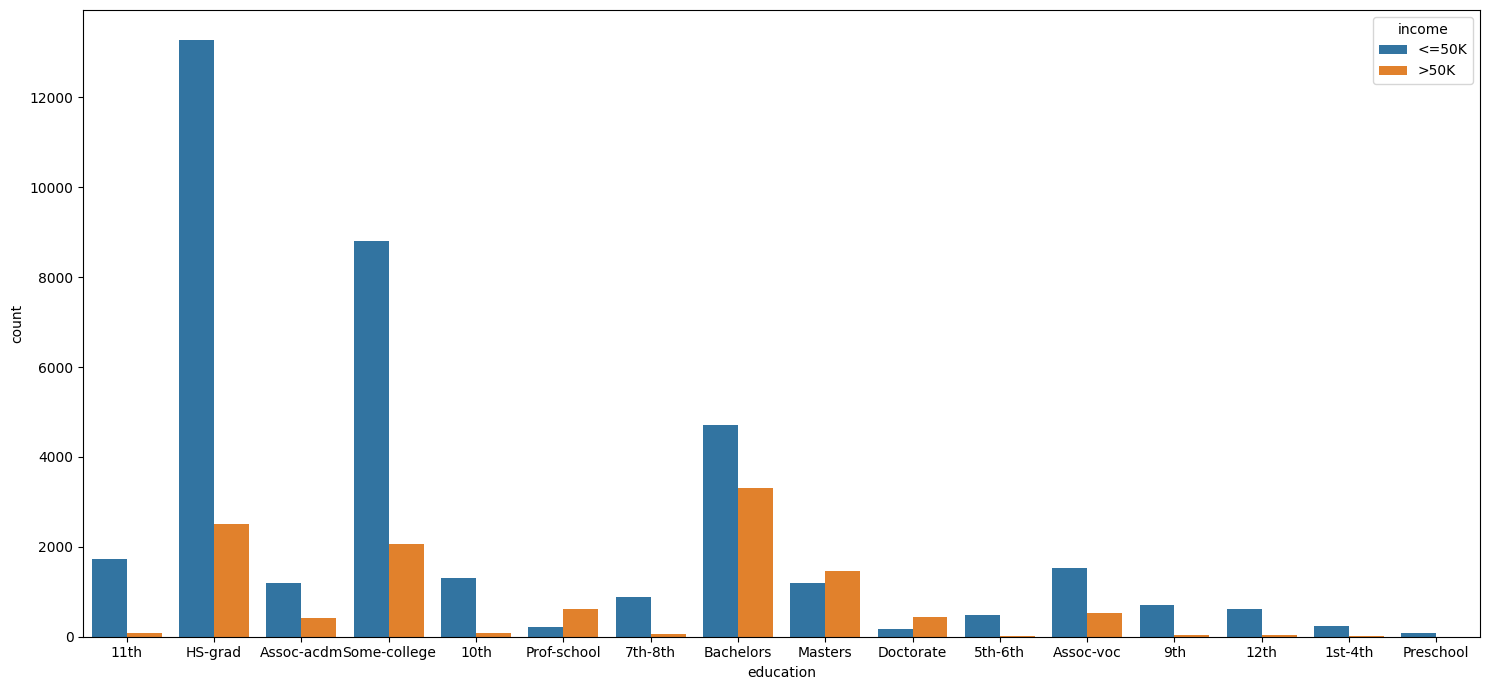

In [27]:
fig = plt.figure(figsize=(15,7))
sb.countplot('education', hue='income', data=df)
plt.tight_layout()
plt.show()

c:\users\pulkit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


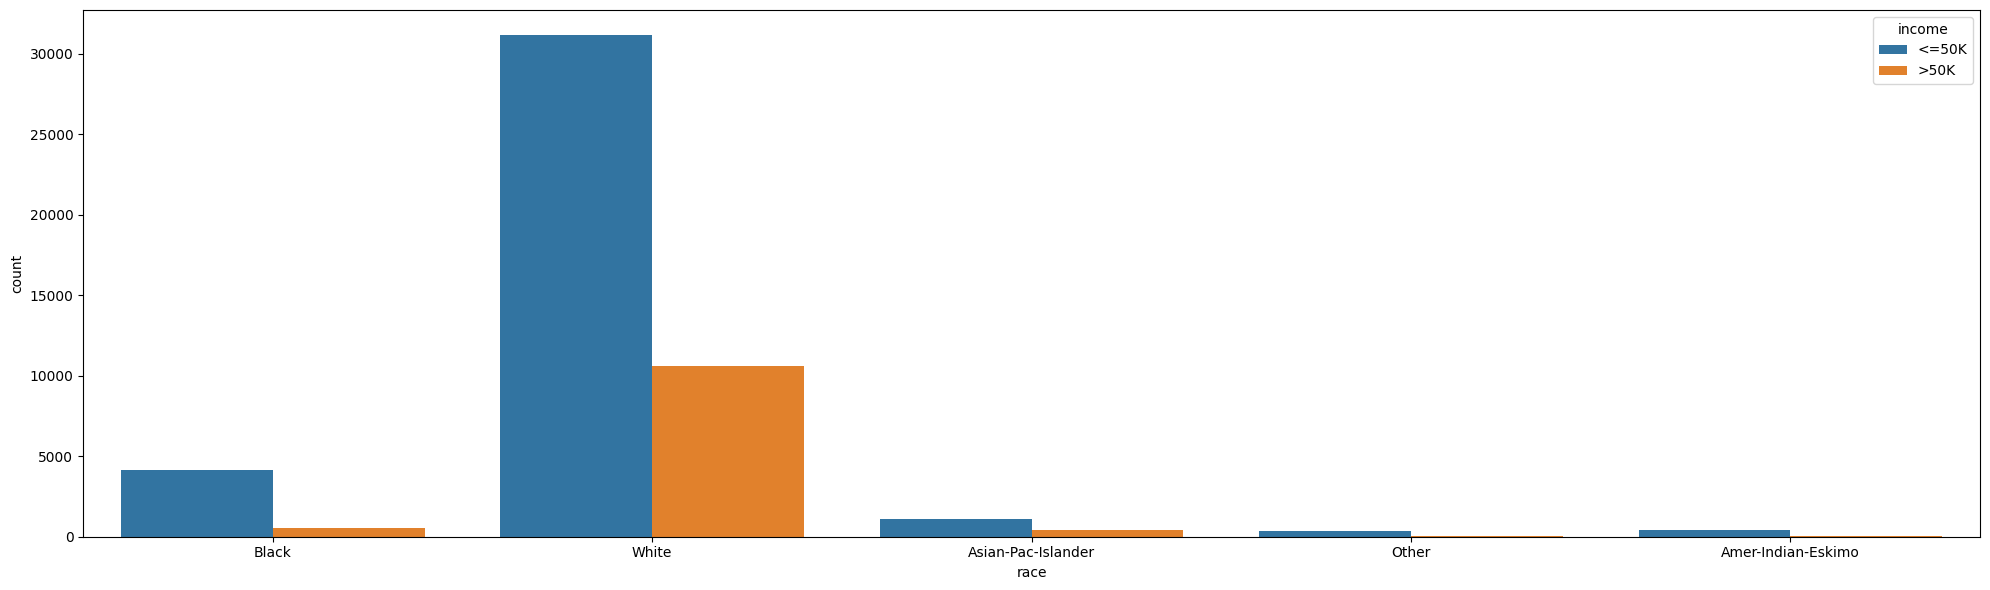

In [28]:
fig = plt.figure(figsize=(20,6))

sb.countplot('race', hue='income', data=df)
plt.tight_layout()
plt.show()

### Find and treat the outliers and missing values :-

In [29]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['age'])

Outliers: [80, 90, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 81, 80, 88, 87, 90, 83, 80, 90, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 81, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 81, 80, 83, 90, 90, 81, 90, 90, 80, 90, 90, 84, 90, 80, 90, 81, 83, 84, 81, 85, 82, 80, 90, 90, 90, 84, 80, 90, 90, 84, 90, 90, 90, 90, 82, 81, 90, 84, 81, 82, 81, 80, 90, 80, 84, 82, 90, 84, 90, 83, 81, 80, 80, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 80, 82, 85, 80, 90, 81, 80, 81, 82, 88, 90, 82, 88, 84, 83, 86, 90, 90, 82, 83, 81, 90, 80, 81, 84, 84, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]


In [30]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['capital-gain'])

Outliers: [99999, 27828, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 27828, 25236, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 41310, 99999, 99999, 34095, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 27828, 27828, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 27828, 25124, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 25236, 99999, 27828, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 25236, 27828, 27828, 27828, 27828, 99999, 27828, 99999, 99999, 99999, 99999, 27828, 99999, 27828, 25124, 99999, 99999, 99999, 99999, 27828, 34095, 25236, 99999, 99999, 99999, 99999, 25124, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 34095, 99

In [31]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['capital-loss'])

Outliers: [1721, 1876, 2415, 1887, 1887, 1887, 1887, 1977, 2057, 1429, 1590, 2057, 1721, 1887, 1485, 1485, 1977, 1887, 1721, 1887, 2051, 2377, 1672, 1628, 1902, 1672, 1602, 1902, 1590, 1977, 1741, 1887, 2444, 1876, 1902, 1408, 1902, 2001, 2001, 2415, 2042, 1740, 1876, 1825, 1902, 1887, 1977, 1887, 1902, 1887, 1902, 2415, 1848, 1719, 3004, 1590, 1977, 1887, 1977, 2001, 1902, 1977, 2179, 1902, 1573, 1429, 2205, 1977, 2339, 1887, 2339, 1726, 2258, 1672, 1590, 1887, 1340, 2415, 1602, 1504, 1887, 2415, 2559, 1977, 1848, 2258, 1902, 1887, 1668, 1974, 1977, 1741, 2205, 1980, 2051, 2377, 1902, 2444, 1564, 1408, 1902, 1977, 2547, 1902, 2002, 2057, 2001, 1977, 1977, 1628, 1902, 1876, 1848, 1719, 1669, 1902, 1902, 2339, 1902, 2339, 1902, 1887, 1902, 1887, 1719, 1429, 2001, 1485, 1902, 1980, 1504, 1887, 1902, 1977, 1617, 1741, 2051, 2205, 1980, 1902, 1887, 2205, 1721, 1602, 1573, 1977, 2415, 3175, 1668, 2472, 1669, 1602, 2057, 1504, 2174, 1902, 1902, 1579, 1902, 1741, 1902, 1902, 1579, 1590, 1977,

Before removing the outliers


c:\users\pulkit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


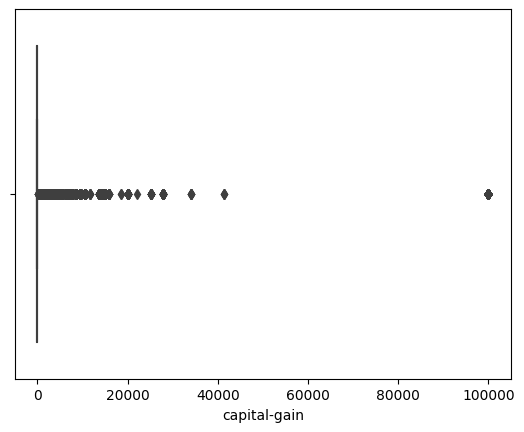

In [32]:
sb.boxplot(df['capital-gain'])
print("Before removing the outliers")

In [33]:
### we find outliers only in captail-gain ,capital gain >40000 is very rare because most of them have salary less than or equal to 50


df.drop(df[ df['capital-gain'] > 40000 ].index,inplace=True)
df.shape

(48595, 15)

After removing the outliers


c:\users\pulkit\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


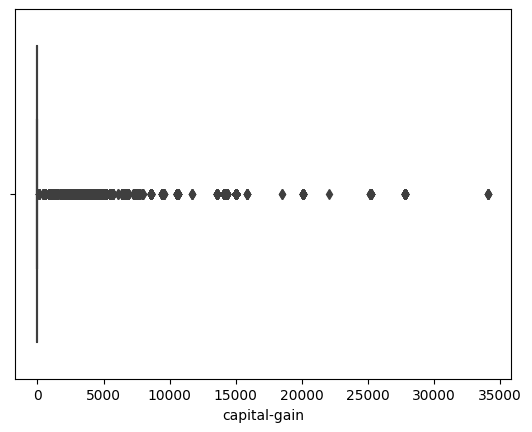

In [34]:
sb.boxplot(df['capital-gain'])
print("After removing the outliers")

### HEXBIN PLOT :--


A hexbin plot is useful to represent the relationship of 2 numerical variables when you have a lot of data points. Without overlapping of the points, the plotting window is split into several hexbins. The color of each hexbin denotes the number of points in it. This can be easily done using the hexbin() function of matplotlib. Note that you can change the size of the bins using the gridsize argument.



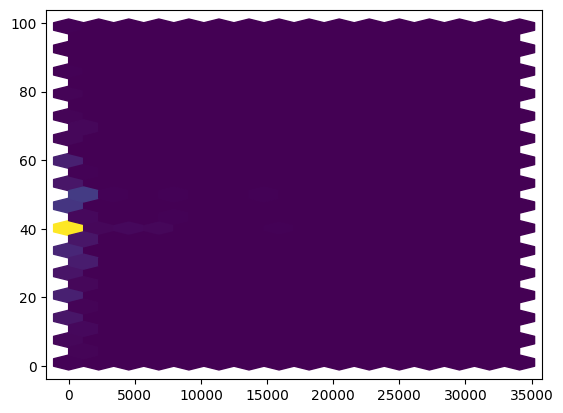

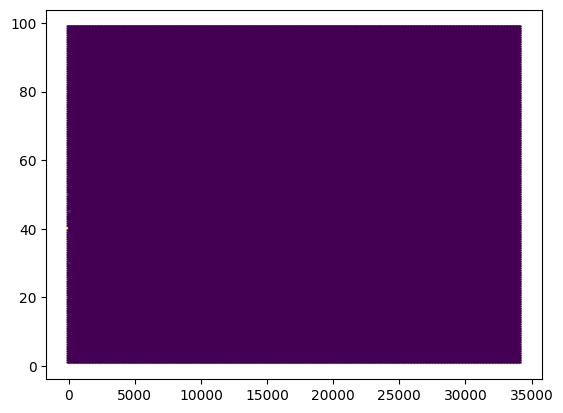

In [35]:
x= df['capital-gain']
y= df['hours-per-week']
 
# Make the plot
plt.hexbin(x, y, gridsize=(15,15) )
plt.show()
 
# We can control the size of the bins:
plt.hexbin(x, y, gridsize=(150,150) )
plt.show()

In [36]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076617,0.027210,0.114328,0.057726,0.069919
fnlwgt,-0.076617,1.000000,-0.038856,-0.003841,-0.004412,-0.013932
educational-num,0.027210,-0.038856,1.000000,0.146414,0.082698,0.139017
capital-gain,0.114328,-0.003841,0.146414,1.000000,-0.050169,0.082599
capital-loss,0.057726,-0.004412,0.082698,-0.050169,1.000000,0.055620
hours-per-week,0.069919,-0.013932,0.139017,0.082599,0.055620,1.000000


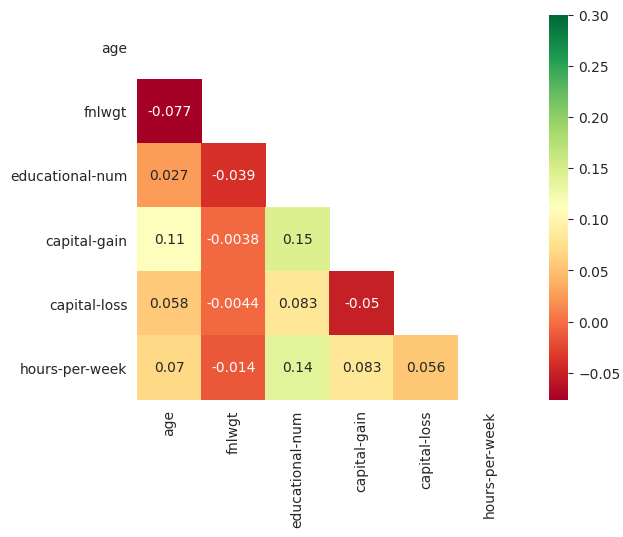

In [37]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sb.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sb.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')

plt.show()

##### From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

#### CONCLUSION:-

#### FOR FEMALE:-  (WORKCLASS-- PRIVATE)
    
- EITHER MARRIED/UNMARRIED HAVE DONE HS-GRAD DEGREE SPEND MORE NO. OF HOURS PER WEEK AS A "ADM-CLERICAL" HAVING SALARY <= 50K.


- EITHER MARRIED/UNMARRIED HAVE DONE BACHELOR DEGREE SPEND MORE NO. OF HOURS PER WEEK AS A "PROF-SPECIALTY" HAVING SALARY <= 50K OR SALARY > 50K.


- EITHER MARRIED/UNMARRIED HAVE DONE MASTERS DEGREE SPEND MORE NO. OF HOURS PER WEEK AS A "PROF-SPECIALTY" HAVING SALARY > 50K.




#### FOR MALE:- (WORKCLASS-- PRIVATE)

- EITHER MARRIED/UNMARRIED HAVE DONE HS-GRAD DEGREE SPEND MORE NO. OF HOURS PER WEEK AS A "CRAFT-REPAIR" HAVING SALARY <= 50K OR SALARY > 50K.


- EITHER MARRIED/UNMARRIED HAVE DONE BACHELOR DEGREE SPEND MORE NO. OF HOURS PER WEEK AS A "EXEC-MANAGERIAL" HAVING SALARY > 50K.


- EITHER MARRIED/UNMARRIED HAVE DONE MASTERS DEGREE SPEND MORE NO. OF HOURS PER WEEK AS A "PROF-SPECIALTY" HAVING SALARY <= 50K.
 
 
 ##### AT LAST, BY OBVERSING AND ANALYSIS, "PROF-SPECIALTY" IS HAVING MORE NO.OF COUNT IN BOTH MALE AND FEMALE.

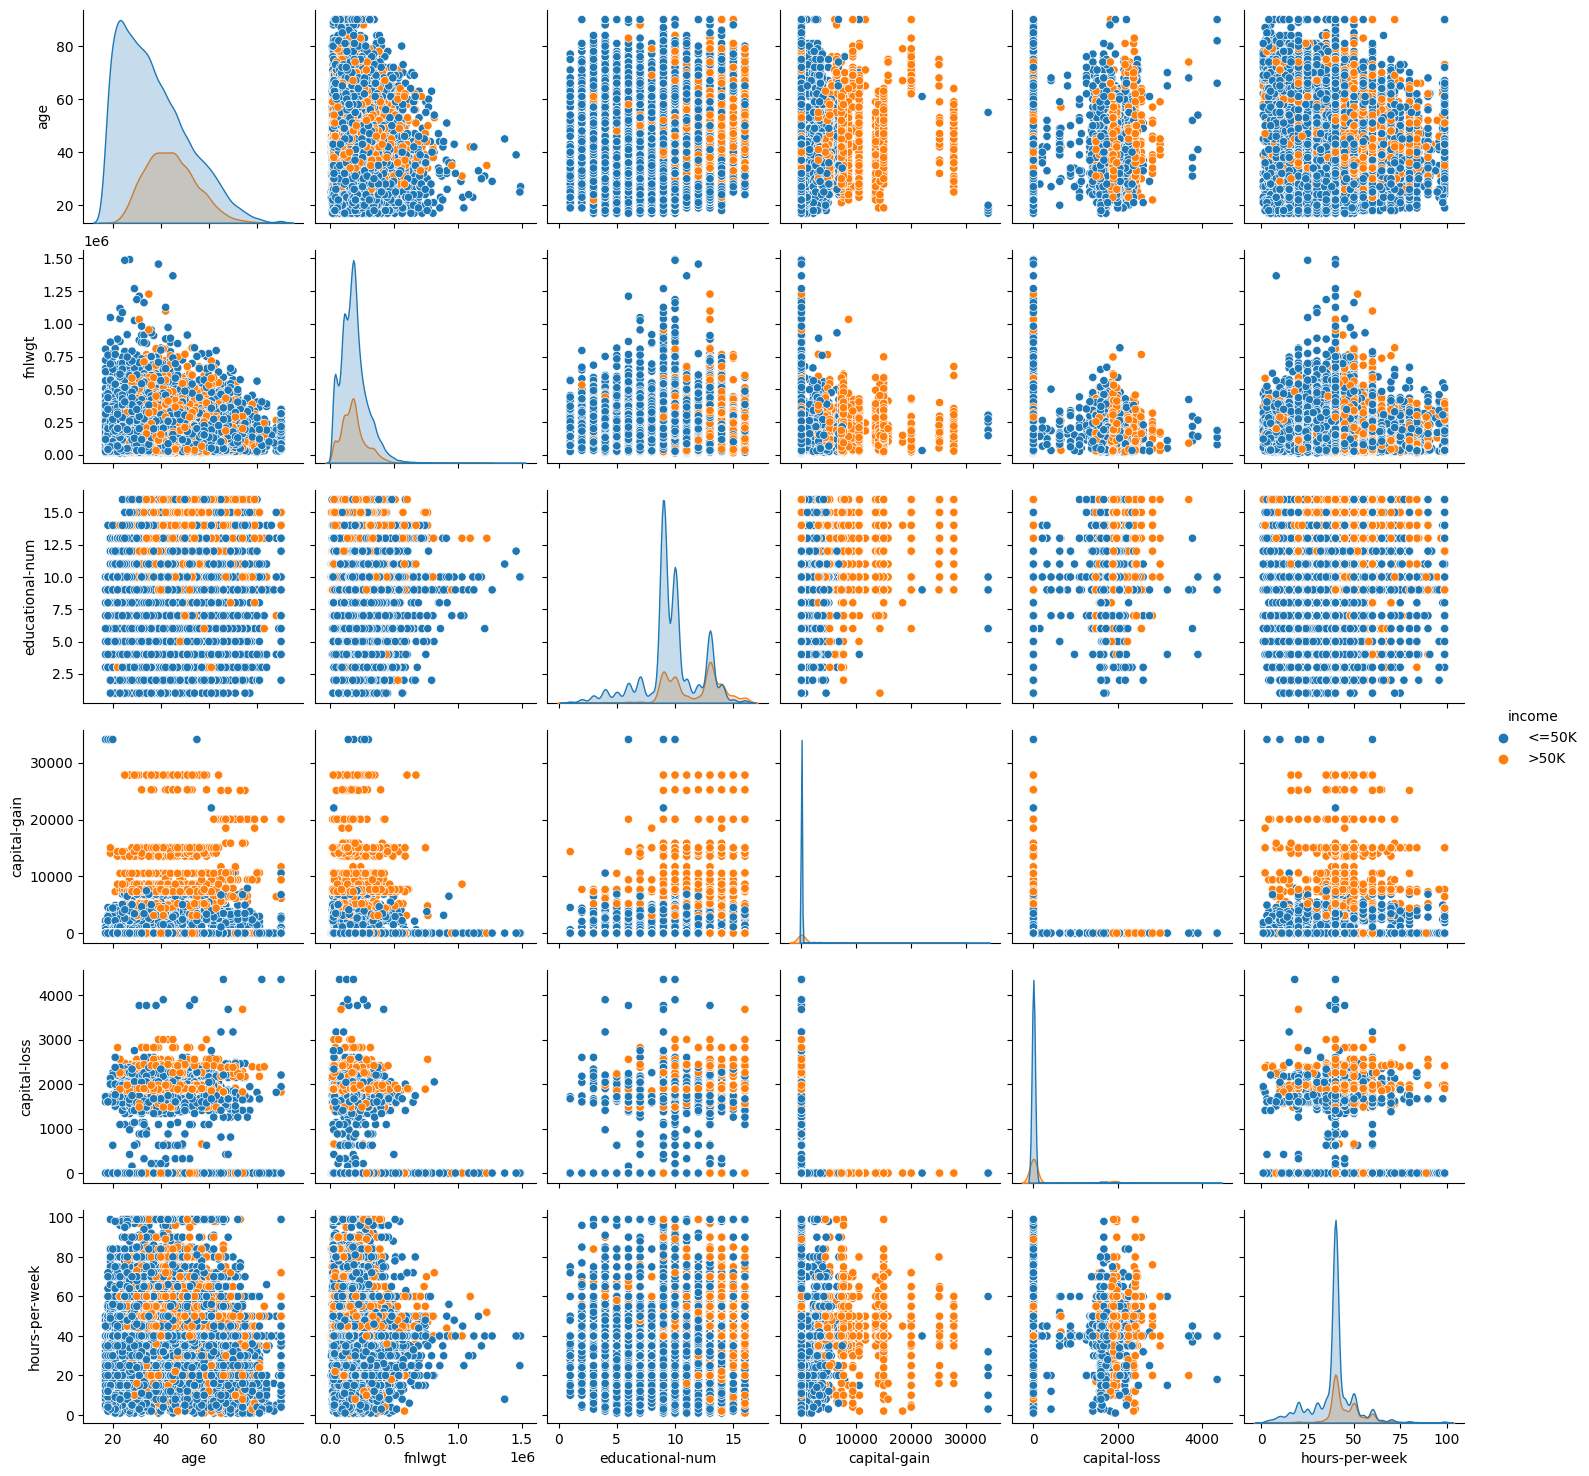

In [38]:
sb.pairplot(df , hue = 'income')

## Standardization:--


Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation


formula for standardization:

 $$ X^{\prime}=\frac{X-\mu}{\sigma} $$
 
Mu is the mean of the feature values and Sigma is the standard deviation of the feature values. Note that in this case, the values are not restricted to a particular range.

In [39]:
numerical=df.select_dtypes(include=["int64"]).keys()
numerical

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [40]:
capital_gain = preprocessing.scale(df['capital-gain'])

print(capital_gain)

[-0.23044397 -0.23044397 -0.23044397 ... -0.23044397 -0.23044397
  5.73990111]


In [41]:
capital_loss = preprocessing.scale(df['capital-loss'])

print(capital_loss)

[-0.21770429 -0.21770429 -0.21770429 ... -0.21770429 -0.21770429
 -0.21770429]


In [42]:
hours_per_week = preprocessing.scale(df['hours-per-week'])

print(hours_per_week)

[-0.02999964  0.77855982 -0.02999964 ... -0.02999964 -1.64711856
 -0.02999964]


### feature transformation for categorial

In [43]:
dumydata=pd.get_dummies(df, columns=["workclass", "education", "marital-status", "occupation"])
dumydata

,age,fnlwgt,educational-num,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,7,Own-child,Black,Male,0,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,9,Husband,White,Male,0,0,50,United-States,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,12,Husband,White,Male,0,0,40,United-States,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,Husband,Black,Male,7688,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,10,Own-child,White,Female,0,0,30,United-States,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Wife,White,Female,0,0,38,United-States,...,0,0,0,0,0,0,0,0,1,0
48838,40,154374,9,Husband,White,Male,0,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
48839,58,151910,9,Unmarried,White,Female,0,0,40,United-States,...,0,0,0,0,0,0,0,0,0,0
48840,22,201490,9,Own-child,White,Male,0,0,20,United-States,...,0,0,0,0,0,0,0,0,0,0


In [44]:
dumydata=dumydata.drop(columns=["relationship","race","native-country"])

In [45]:
def sex_to_numeric(x):
 if x=='Male':
     return 1
 if x=='Female':
     return 0

dumydata['gender'] = dumydata['gender'].apply(sex_to_numeric)

In [46]:
dumydata

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,7,1,0,0,40,<=50K,0,0,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,9,1,0,0,50,<=50K,0,0,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,12,1,0,0,40,>50K,0,1,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,1,7688,0,40,>50K,0,0,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,10,0,0,0,30,<=50K,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,0,1,0
48838,40,154374,9,1,0,0,40,>50K,0,0,...,0,0,1,0,0,0,0,0,0,0
48839,58,151910,9,0,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0
48840,22,201490,9,1,0,0,20,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building a machine learning model:-

In [47]:
x= dumydata.drop(['income'],axis=1)

In [48]:
y= dumydata['income']

## Train_test_split

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

## Logistic regression:-

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model= LogisticRegression()

In [52]:
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
model.score(X_test, y_test)*100

80.3329799837875

## Decision Tree classifier:-

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
dt.score(X_test, y_test)*100

82.0540001247116

## RandomForest Classifier:-

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfcmodel= RandomForestClassifier(max_leaf_nodes=14)
rfcmodel.fit(X_train, y_train)
rfcmodel.score(X_test, y_test)*100

84.80389100205774

### Analysis of Algorithms:-

In [59]:
data = {'Algorithms':['Logistic Regression', 'Decision Tree Classifier','Random forest classifier'],
        'Score':[model.score(X_test, y_test)*100,dt.score(X_test, y_test)*100,rfcmodel.score(X_test, y_test)*100]}

In [60]:
score_df = pd.DataFrame(data)
score_df

,Algorithms,Score
0,Logistic Regression,80.332980
1,Decision Tree Classifier,82.054000
2,Random forest classifier,84.803891


### Conclusion:-

- By building various models like logistic regression, decision tree classifier, random forest classifier.

- Random forest classifier gives the highest score of 85.128141.

